In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("wine.csv")
data_np = data.to_numpy()

In [3]:
actual_labels = data_np[:,0].astype(int) - 1

In [4]:
features_np = data_np[:,1:]

In [6]:
scaler = StandardScaler()
scaler.fit(features_np)
scaled_data = scaler.transform(features_np)

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)

predicted_results = kmeans.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
for i,predicted in enumerate(predicted_results):
    print(f"Actual: {actual_labels[i]} and predicted {predicted}")

Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 and predicted 2
Actual: 0 an

In [19]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
projected_axes = pca.transform(scaled_data)

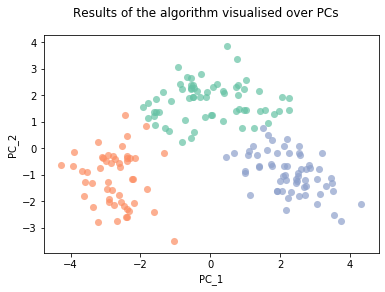

In [20]:
columnIDToVisX = 0 # some variable to keep indexing simple and flexible
columnIDToVisY = 1

plt.suptitle('Results of the algorithm visualised over PCs')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
# some plotting using numpy's logical indexing
plt.scatter(projected_axes[predicted_results ==0,columnIDToVisX], projected_axes[predicted_results==0,columnIDToVisY], c = "#66c2a5", s = 50, alpha = 0.7, linewidth='0') # greenish
plt.scatter(projected_axes[predicted_results ==1,columnIDToVisX], projected_axes[predicted_results==1,columnIDToVisY], c = "#fc8d62", s = 50, alpha = 0.7, linewidth='0') # orangish
plt.scatter(projected_axes[predicted_results ==2,columnIDToVisX], projected_axes[predicted_results==2,columnIDToVisY], c = "#8da0cb", s = 50, alpha = 0.7, linewidth='0') # blueish
plt.show()

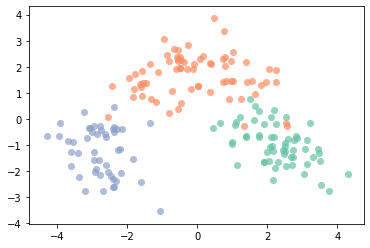

In [21]:
# some plotting using numpy's logical indexing
plt.scatter(projected_axes[actual_labels ==0,columnIDToVisX], projected_axes[actual_labels==0,columnIDToVisY], c = "#66c2a5", s = 50, alpha = 0.7, linewidth='0') # greenish
plt.scatter(projected_axes[actual_labels ==1,columnIDToVisX], projected_axes[actual_labels==1,columnIDToVisY], c = "#fc8d62", s = 50, alpha = 0.7, linewidth='0') # orangish
plt.scatter(projected_axes[actual_labels ==2,columnIDToVisX], projected_axes[actual_labels==2,columnIDToVisY], c = "#8da0cb", s = 50, alpha = 0.7, linewidth='0') # blueish
plt.show()

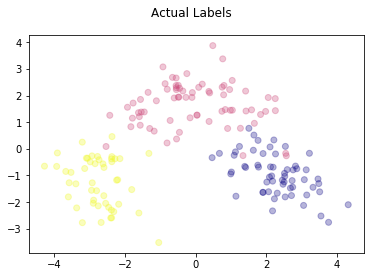

In [46]:
plt.scatter(projected_axes[:,columnIDToVisX], projected_axes[:,columnIDToVisY], c = actual_labels, cmap = "plasma", alpha= 0.3)
plt.suptitle("Actual Labels")
plt.show()

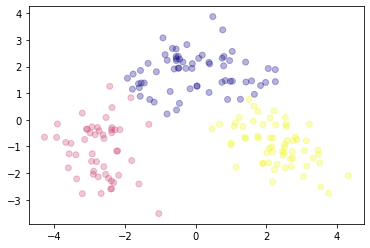

In [44]:
plt.scatter(projected_axes[:,columnIDToVisX], projected_axes[:,columnIDToVisY], c = predicted_results, cmap = "plasma", alpha= 0.3)

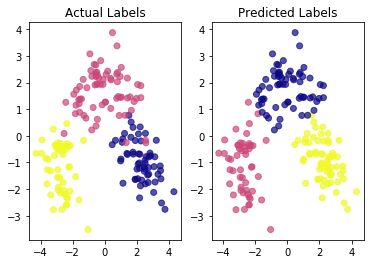

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(projected_axes[:,0], projected_axes[:,1], c = actual_labels, cmap = "plasma", alpha= 0.7)
ax2.scatter(projected_axes[:,0], projected_axes[:,1], c = predicted_results, cmap = "plasma", alpha= 0.7)

ax1.set_title("Actual Labels")
ax2.set_title("Predicted Labels")
plt.show()

In [1]:
from sklearn import datasets
n_samples = 2000
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.15)
X, y_true = noisy_moons[0], noisy_moons[1]

In [2]:
noisy_moons

(array([[ 0.61694   ,  0.82746993],
        [ 0.5534749 ,  0.87824572],
        [ 0.60185285,  0.74882799],
        ...,
        [-0.53091879,  0.623519  ],
        [ 0.35202407, -0.1386708 ],
        [ 0.99783437,  0.20068089]]),
 array([0, 0, 0, ..., 0, 1, 0], dtype=int64))

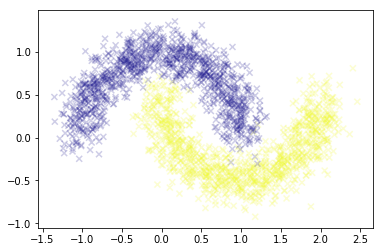

In [10]:
plt.scatter(X[:,0],X[:,1], c=y_true, cmap = 'plasma', alpha = 0.2, marker='x')
plt.show()

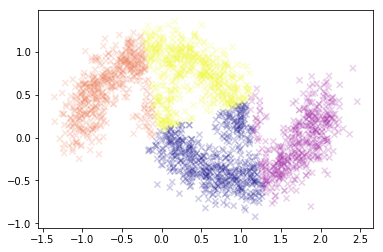

In [14]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_pred = kmeans.labels_
plt.scatter(X[:,0],X[:,1], c=y_pred, cmap = 'plasma', alpha = 0.2, marker='x')
plt.show()

In [27]:
inertias = []
for i in range(1,30):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

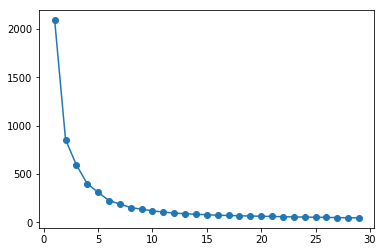

In [29]:
plt.plot(range(1,30),inertias, marker = 'o')

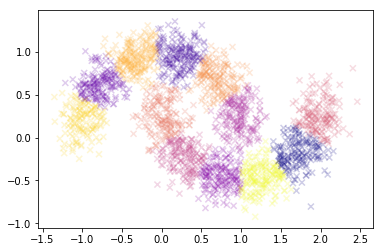

In [30]:
kmeans = KMeans(n_clusters=12)
kmeans.fit(X)
y_pred = kmeans.labels_
plt.scatter(X[:,0],X[:,1], c=y_pred, cmap = 'plasma', alpha = 0.2, marker='x')
plt.show()

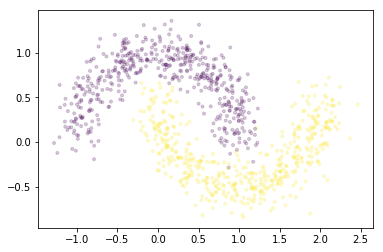

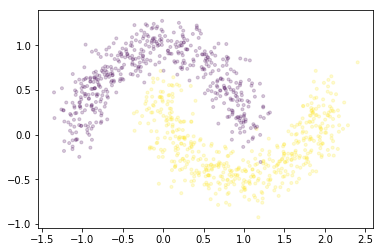

In [31]:
X_train = X[:int(n_samples/2), :]
X_test = X[int(n_samples/2):, :]

y_true_train = y_true[:int(n_samples/2), ]
y_true_test = y_true[int(n_samples/2):, ]

plt.scatter( X_train[:,0], X_train[:,1], c=y_true_train, marker = '.', alpha = 0.2)
plt.show()

plt.scatter( X_test[:,0], X_test[:,1], c=y_true_test, marker = '.', alpha = 0.2)
plt.show()

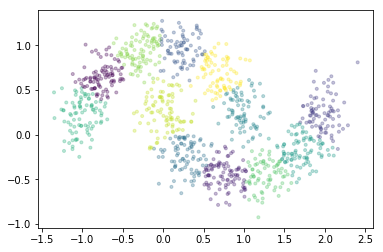

In [32]:
km_moons = KMeans(n_clusters = 12)
km_moons.fit(X_train)

assigned_cluster_test = km_moons.predict(X_test) 

plt.scatter( X_test[:,0], X_test[:,1], c=assigned_cluster_test, marker = '.', alpha = 0.3)
plt.show()